# task

build/train a machine learning model to predict online food orders for a particular customer

In [1]:
import pandas as pd

df = pd.read_csv("order.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [2]:
len(df.columns)

13

In [3]:
df.shape

(388, 13)

check for null values

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

no null views

show more information about the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [7]:
df['Age'].unique()

array([20, 24, 22, 27, 23, 21, 28, 25, 32, 30, 31, 26, 18, 19, 33, 29])

some data visualization

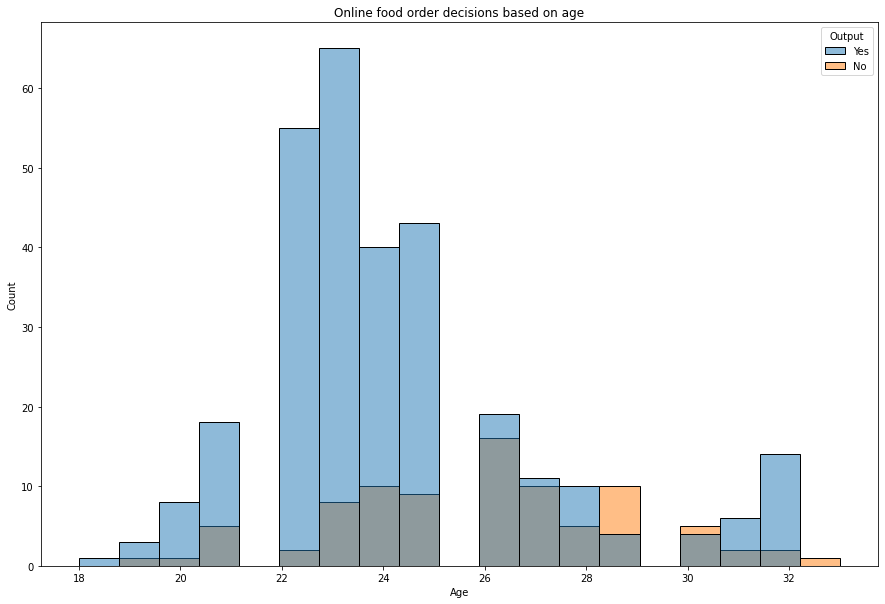

In [8]:
# look at the online order decisions based on age of customer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (15, 10))
plt.title('Online food order decisions based on age')
# plt.hist(x= 'Age', data= df)
sns.histplot(x= 'Age', hue= 'Output', data = df)
plt.show()

the age group between 22 and 25 seem to order more online based on the data

online foood order decisions based on family size

In [9]:
df['Family size'].dtype

dtype('int64')

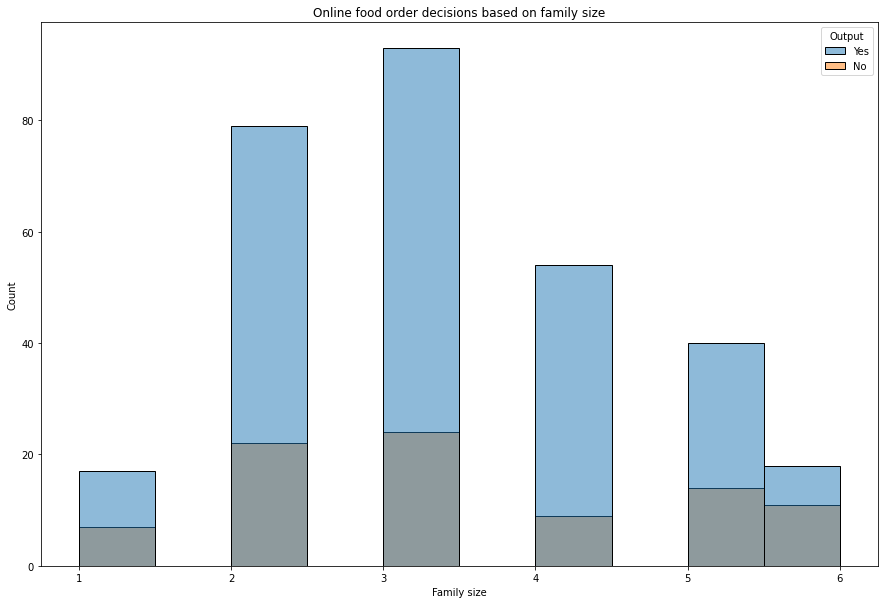

In [10]:
plt.figure(figsize= (15, 10))
plt.title('Online food order decisions based on family size')
sns.histplot(x= 'Family size', hue= 'Output', data = df)
plt.show()

the family size of 3 seems to order the most online

look a the gender that re-orders more oftenly

In [11]:
df.query('Output == "Yes"')

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [12]:
order_again = df.query('Output == "Yes"')
order_again.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


plot a pie to find out who reorders more oftenly

In [13]:
import plotly.graph_objects as go

In [14]:
gender = order_again.Gender.value_counts()
label= gender.index
counts = gender.values
colors = ['red', 'blue']

fig = go.Figure(data= [go.Pie(labels= label, values= counts)])
fig.update_layout(title_text= 'Who orders online more: Male/Female')
fig.update_traces(hoverinfo= 'label+percent', textinfo= 'value', textfont_size= 30, marker= dict(colors= colors, line= dict(color= 'black', width= 3)))
fig.show()

males order more online as compared to females according to the data

what status of marriage orders more online?

In [15]:
order_again['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [16]:
marital = order_again['Marital Status'].value_counts()
label= marital.index
counts = marital.values
colors = ['red', 'blue']

fig = go.Figure(data= [go.Pie(labels= label, values= counts)])
fig.update_layout(title_text= 'Who orders online more: Male/Female')
fig.update_traces(hoverinfo= 'label+percent', textinfo= 'value', textfont_size= 30, marker= dict(colors= colors, line= dict(color= 'black', width= 3)))
fig.show()

76.1% of the customers ordering again are singles

look at the income group ordering again

In [17]:
order_again['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [18]:
income = order_again['Monthly Income'].value_counts()
label= income.index
counts = income.values
colors = ['red', 'blue']

fig = go.Figure(data= [go.Pie(labels= label, values= counts)])
fig.update_layout(title_text= 'Who orders online more: Male/Female')
fig.update_traces(hoverinfo= 'label+percent', textinfo= 'value', textfont_size= 30, marker= dict(colors= colors, line= dict(color= 'black', width= 3)))
fig.show()

it appears that from the data customers with no income order again more frequently accounting for 54.5% of the customers

In [19]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

convert object dtypes to int 

In [20]:
df1 = df.copy()
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [21]:
# view all unique values in the columns using a function

def print_unique(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f'{column}: {df[column].unique()}')


  

In [22]:
print_unique(df1)

Gender: ['Female' 'Male']
Marital Status: ['Single' 'Married' 'Prefer not to say']
Occupation: ['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income: ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications: ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Output: ['Yes' 'No']
Feedback: ['Positive' 'Negative ']
Unnamed: 12: ['Yes' 'No']


In [23]:
df1.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [24]:
# # label encode categorical variables using a function
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# def label_encode(df):
#   for column in df:
#     if df[column].dtypes == "object":
#       df[column] = le.fit_transform(df[column])
#       print(f'{column}: {df[column].unique()}')


In [25]:
# label_encode(df1)

don't use label encoder for ease of user input rather manually encode

In [26]:
print_unique(df1)

Gender: ['Female' 'Male']
Marital Status: ['Single' 'Married' 'Prefer not to say']
Occupation: ['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income: ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications: ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Output: ['Yes' 'No']
Feedback: ['Positive' 'Negative ']
Unnamed: 12: ['Yes' 'No']


In [27]:
df1["Gender"] = df1["Gender"].replace({"Male": 1, "Female": 0})
df1["Marital Status"] = df1["Marital Status"].replace({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
df1["Occupation"] = df1["Occupation"].replace({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
df1["Educational Qualifications"] = df1["Educational Qualifications"].replace({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
df1["Monthly Income"] = df1["Monthly Income"].replace({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
df1["Feedback"] = df1["Feedback"].replace({"Positive": 1, "Negative ": 0})

df1["Output"] = df1["Output"].replace({"Yes": 1, "No": 0})


In [28]:
def print_unique(df):
  for column in df:
      print(f'{column}: {df[column].unique()}')

In [29]:
print_unique(df1)

Age: [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Gender: [0 1]
Marital Status: [1 2 0]
Occupation: [1 2 3 4]
Monthly Income: [    0 10000  7000 25000  5000]
Educational Qualifications: [2 1 3 5 4]
Family size: [4 3 6 2 5 1]
latitude: [12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12.9343 13.0012 12.9442 13.0487 12.9889 12.9335
 13.102  12.9048 12.9337 12.9037 13.0289 12.9561 12.9579 13.014  13.0138
 12.9537 12.998  13.0496 13.0166 13.0503 12.9883 13.0626 12.957  12.8652
 12.9757 12.9621 12.9217 13.0223 13.0262 13.0078 12.9105 12.8834 12.9149
 12.9706 13.0103 13.0641 12.9369 13.0809 12.9859 12.9866 12.9847 12.989
 12.9251 12.9967 13.0734 12.9515 12.9719]
longitude: [77.5993 77.5773 77.6593 77.5616 77.5533 77.6848 77.6131 77.7081 77.5764
 77.5738 77.6399 77.6408 77.6256 77.6047 77.6409 77

In [30]:
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,1,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,1,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,1,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,1,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,1,1,Yes


Train machine learning Model

Drop the location variables ie. longitude and latitude

also drop unnamed column

In [31]:
df2 = df1.drop(["longitude", "latitude", "Unnamed: 12"], axis= 1)
df2.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Output',
       'Feedback'],
      dtype='object')

In [32]:
# define X and y
X = df2.drop("Output", axis = 1)
y = df2.Output

In [33]:
X.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Feedback
0,20,0,1,1,0,2,4,560001,1
1,24,0,1,1,10000,1,3,560009,1
2,22,1,1,1,10000,2,3,560017,0
3,22,0,1,1,0,1,6,560019,1
4,22,1,1,1,10000,2,4,560010,1


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Output, dtype: int64

In [35]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [36]:
X_train.shape

(310, 9)

In [37]:
X_test.shape

(78, 9)

carry out a model evaluation using gridsearch_cv

In [38]:
# import required models to evaluate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
import numpy as np


In [39]:
import warnings

warnings.filterwarnings('ignore')

In [40]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weighth': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [41]:
find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.308678,{'normalize': False}
1,lasso,0.012815,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.189224,"{'criterion': 'mse', 'splitter': 'random'}"
3,XGBoost,0.867742,"{'gamma': 0.5, 'max_depth': 5, 'min_child_weig..."
4,LogisticRegression,0.858065,"{'C': 29.763514416313132, 'penalty': 'l1', 'so..."
5,RandomForestClassifier,0.877419,"{'max_features': 'auto', 'n_estimators': 60}"


randomforestclassifier has the best accuracy hence recommended

In [42]:
model = RandomForestClassifier(n_estimators= 100, max_features= 'auto')
model

RandomForestClassifier()

fit a model

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [45]:
model.score(X_test, y_test)

0.9102564102564102

evaluate model with cross_val_score

In [47]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits= 10)
score = cross_val_score(model, X_train, y_train, cv= kf)
score.mean()

0.8806451612903226

view data inform of age vs reoder habits

In [48]:
X_test.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Feedback'],
      dtype='object')

In [51]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [55]:
sub = pd.DataFrame(
    {'age': X_test.Age,
     'order': y_pred}, columns= ['age', 'order']
)

sub['order'] = sub['order'].replace({0:'No', 1:'Yes'})
sub.head()

,age,order
328,22,Yes
295,24,Yes
280,19,Yes
66,24,Yes
146,23,Yes


a confusion  matrix and classification report

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.92      0.97      0.94        60

    accuracy                           0.91        78
   macro avg       0.89      0.84      0.87        78
weighted avg       0.91      0.91      0.91        78



In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  5],
       [ 2, 58]])

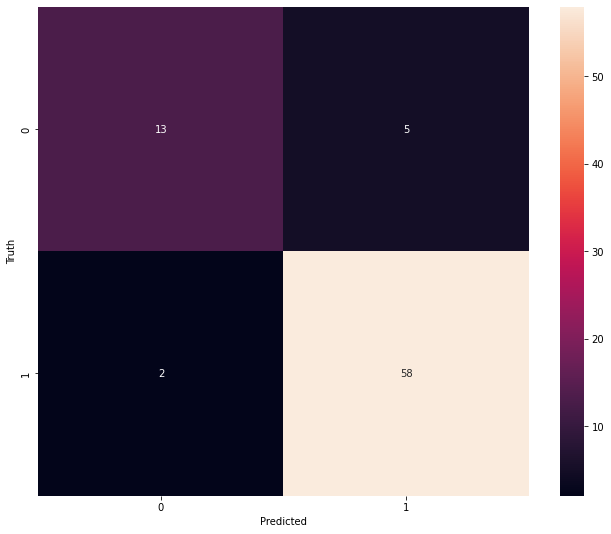

In [61]:
plt.figure(figsize= (11, 9))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

try prediction  with user input

In [62]:
df2.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Output',
       'Feedback'],
      dtype='object')

In [63]:
len(df2.columns)

10

In [64]:
a = df2.drop('Output', axis= 1)
b = df2.Output 

In [65]:
a.columns 

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Feedback'],
      dtype='object')

In [66]:
len(a.columns)

9

In [83]:
def order_again(age, gender, marital, occupation, income, qualification, fam_size, pin, feedback):
  x = np.zeros(len(a.columns))

  x[0] = age
  x[1] = gender
  x[2] = marital
  x[3] = occupation
  x[4] = income
  x[5] = qualification
  x[6] = fam_size
  x[7] = pin
  x[8] = feedback 

  d = model.predict([x])[0]

  if d == 1:
    return 'Yes'
  else:
    return 'No'


test function

In [84]:
order_again(22, 1, 1, 1, 0, 1, 3, 560010, 1)

'Yes'

now try with user input

In [89]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
age = int(input("Enter the Age of the Customer: "))
gender = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
marital = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 0 = Not Revealed): "))
occupation = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
income = int(input("Monthly Income: ('No Income': 0,'25001 to 50000': 5000, 'More than 50000': 7000, '10001 to 25000': 25000, 'Below Rs.10000': 10000)"))
qualification = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
fam_size = int(input("Family Size: "))
pin = int(input("Pin Code: "))
feedback = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
pred = order_again(age, gender, marital, occupation, income, qualification, fam_size, pin, feedback)
print("Will the customer order again ", pred)

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 22
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 0 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: ('No Income': 0,'25001 to 50000': 5000, 'More than 50000': 7000, '10001 to 25000': 25000, 'Below Rs.10000': 10000)0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 3
Pin Code: 560115
Review of the Last Order (1 = Positive, 0 = Negative): 1
Will the customer order again  Yes


export model to pickle file

In [90]:
import pickle
with open('order.pickle', 'wb') as f:
  pickle.dump(model, f)

In [92]:
import json 
columns = {
    'data_columns': [col.lower() for col in a.columns]
}

with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))